<a href="https://colab.research.google.com/github/Hamdan-Naeem/Particle-Tracking/blob/main/Portfolio_One.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

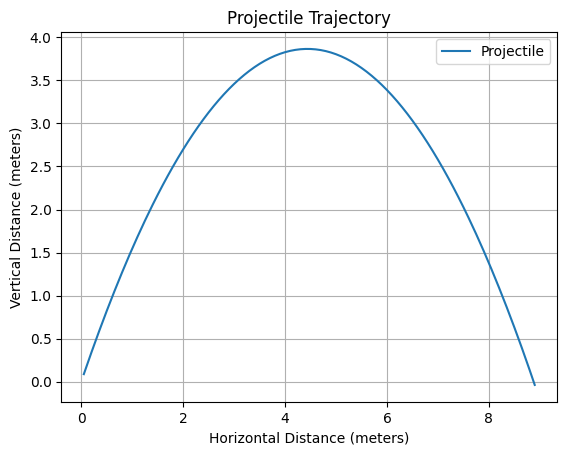

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from math import cos, sin

# Expressions
def euler_method(rx, ry, vx, vy, ax, ay, dt):
    rx = rx + vx * dt
    ry = ry + vy * dt
    vx = vx + ax * dt
    vy = vy + ay * dt
    return rx, ry, vx, vy

def acceleration(vx, vy, g=9.81):
    ax = 0  # Horizontal acceleration is zero in projectile motion
    ay = -g  # Vertical acceleration due to gravity
    return ax, ay

# Parameters
g = 9.81  # Gravitational constant
u_0 = 10  # Initial velocity
t_0 = 0  # Initial time
t_f = 2  # Final time
dt = 0.01  # Time step
rx_0 = 0  # Initial x-position
ry_0 = 0  # Initial y-position
theta = math.radians(60)  # Launch angle in radians

# Initial velocities
vx_0 = u_0 * cos(theta)
vy_0 = u_0 * sin(theta)

# Initialize positions and velocities
rx, ry = rx_0, ry_0
vx, vy = vx_0, vy_0

# Lists to store trajectory points for plotting
rx_values = []
ry_values = []

# While loop for projectile motion simulation
while t_0 < t_f:
    # Calculate acceleration (constant in this case)
    ax, ay = acceleration(vx, vy)

    # Euler method to update position and velocity
    rx, ry, vx, vy = euler_method(rx, ry, vx, vy, ax, ay, dt)

    # Append current positions to lists for plotting
    rx_values.append(rx)
    ry_values.append(ry)

    # Update time
    t_0 += dt

    # Stop the loop if the projectile hits the ground (ry <= 0)
    if ry < 0:
        break

# Plot the projectile trajectory
plt.plot(rx_values, ry_values, label="Projectile")
plt.xlabel('Horizontal Distance (meters)')
plt.ylabel('Vertical Distance (meters)')
plt.grid()
plt.title("Projectile Trajectory")
plt.legend()
plt.show()

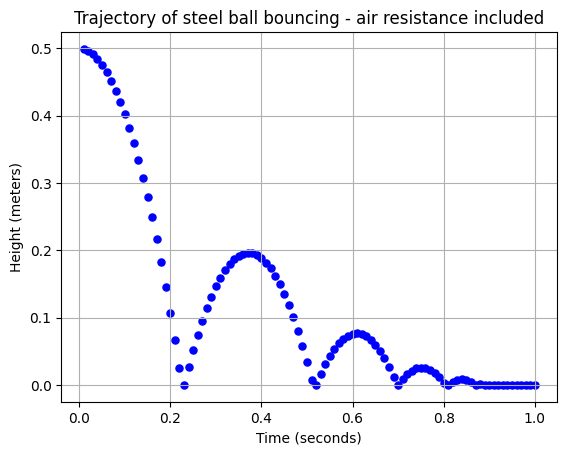

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters related to time
t_0 = 0  # (seconds) The initial time
t_f = 1  # (seconds) Final time
dt = 0.01  # (seconds) Time step

# Horizontal and vertical initial positions assumed to be zero at ground level
rx_0 = 0  # (meters)
ry_0 = 0.5  # (meters) Initial height the steel ball will be dropped from
vx_0 = 0  # (m/s) Horizontal component of velocity - always remains constant
vy_0 = 0  # (m/s) Vertical component of velocity
g = 9.81  # (m/s^2) Acceleration due to gravity
e = 0.65  # Coefficient of restitution
rho_air = 1.2  # (kg/m^3) Density of air
rho_water = 1000  # (kg/m^3) Density of water
rho_glycerin = 1260  # (kg/m^3) Density of glycerin
rho_nylon = 950  # (kg/m^3) Density of nylon

# Steel sphere parameters
rho_steel = 7850  # (kg/m^3) Density of steel
d_steel = 5  # (millimeters) Diameter of steel sphere
r = 0.5 * d_steel * 0.001  # (meters) Radius of steel sphere
volume_steel = 4/3 * np.pi * r**3  # (m^3) Volume of steel sphere
A = np.pi * r**2  # (m^2) Cross-sectional area exposed to air resistance
C_d = 0.47  # Drag coefficient
mass = rho_steel * volume_steel  # (kg) Mass of the steel sphere

# Arrays to store the results for plotting
time_array = []
height_array = []

# Simulation loop (Euler's method)
while t_0 <= t_f:
    vx_current = vx_0
    vy_current = vy_0 - g * dt
    rx_current = rx_0 + vx_current * dt  # New horizontal position of the ball
    ry_current = ry_0 + vy_current * dt  # New vertical position of the ball

    # Hard-sphere model to simulate bounce when the ball hits the ground
    if ry_current < 0 and ry_0 >= 0:
        ry_current = 0
        vy_current = -e * vy_current  # Re-bound velocity determined by CoR

        # Break the loop if the ball's vertical velocity becomes too small
        if abs(vy_current) < 0.01:
            print("The ball has stopped bouncing. Ending simulation.")
            break

    # Forces due to drag
    Fy_D = -0.5 * C_d * A * vy_0**2  # Drag force in the y-direction
    Fx_D = -0.5 * C_d * A * vx_0**2  # Drag force in the x-direction
    F_g = mass * g  # Gravitational force

    # Accelerations using Newton's 2nd law
    ax = Fx_D / mass  # Acceleration in the x-direction
    ay = (Fy_D - F_g) / mass  # Acceleration in the y-direction

    # Update velocities
    vy_0 = vy_current + ay * dt
    vx_0 = vx_current + ax * dt

    # Update positions
    rx_0 = rx_current
    ry_0 = ry_current

    # Update time
    t_0 += dt

    # Store time and height for plotting
    time_array.append(t_0)
    height_array.append(ry_current)

# Plotting the results
plt.figure()
plt.scatter(time_array, height_array, c="blue", s=26)
plt.title("Trajectory of steel ball bouncing - air resistance included")
plt.xlabel('Time (seconds)')
plt.ylabel('Height (meters)')
plt.grid(True)
plt.show()


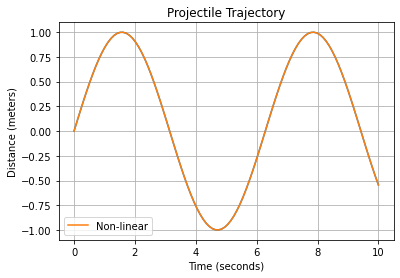

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a numpy array with 100 equally-spaced values between 0 and 2
x = np.linspace(0, 10, 100)  # Linear space, between 0 and 2, with 100 equally-spaced values
y = np.sin(x)
# To draw the x-y pairs of points, call the `plot` function from the matplotlib plotter
plt.plot(x, y)
# When plotting, you can add a `label` keyword argument for specifying
# different names for each plot. Call `plt.legend()` to show their labels
plt.plot(x, y, label='Non-linear')

# Set the x-axis title
plt.xlabel('Time (seconds)')
plt.ylabel('Distance (meters)')
plt.grid()

plt.title("Projectile Trajectory")
plt.legend()
plt.show()
